In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

Files already downloaded and verified
Files already downloaded and verified


<IPython.core.display.Javascript object>


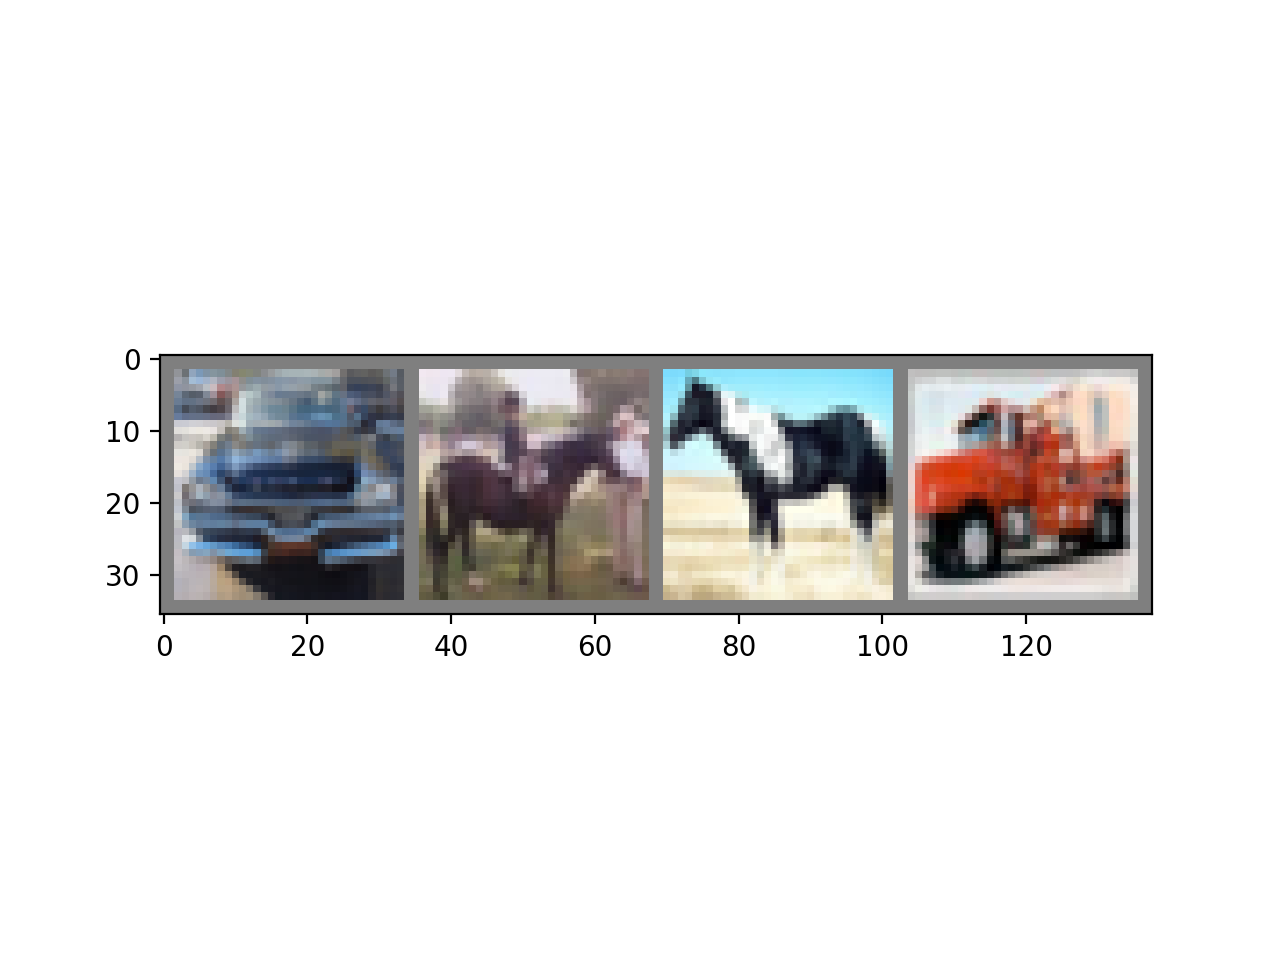

  car horse horse truck


Process Process-2:
Process Process-1:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
  File "/usr/local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 50

In [4]:
%matplotlib nbagg
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
#vgg16 = torchvision.models.vgg16(pretrained=False)
vgg_model = vgg_lite()

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg_model.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = vgg_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.286


Process Process-3:
Process Process-4:
Traceback (most recent call last):
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
    self.run()
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
    r = index_queue.get()
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.fra

RuntimeError: DataLoader worker (pid 58592) exited unexpectedly with exit code 1.

In [11]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = vgg_model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 16 %


<IPython.core.display.Javascript object>


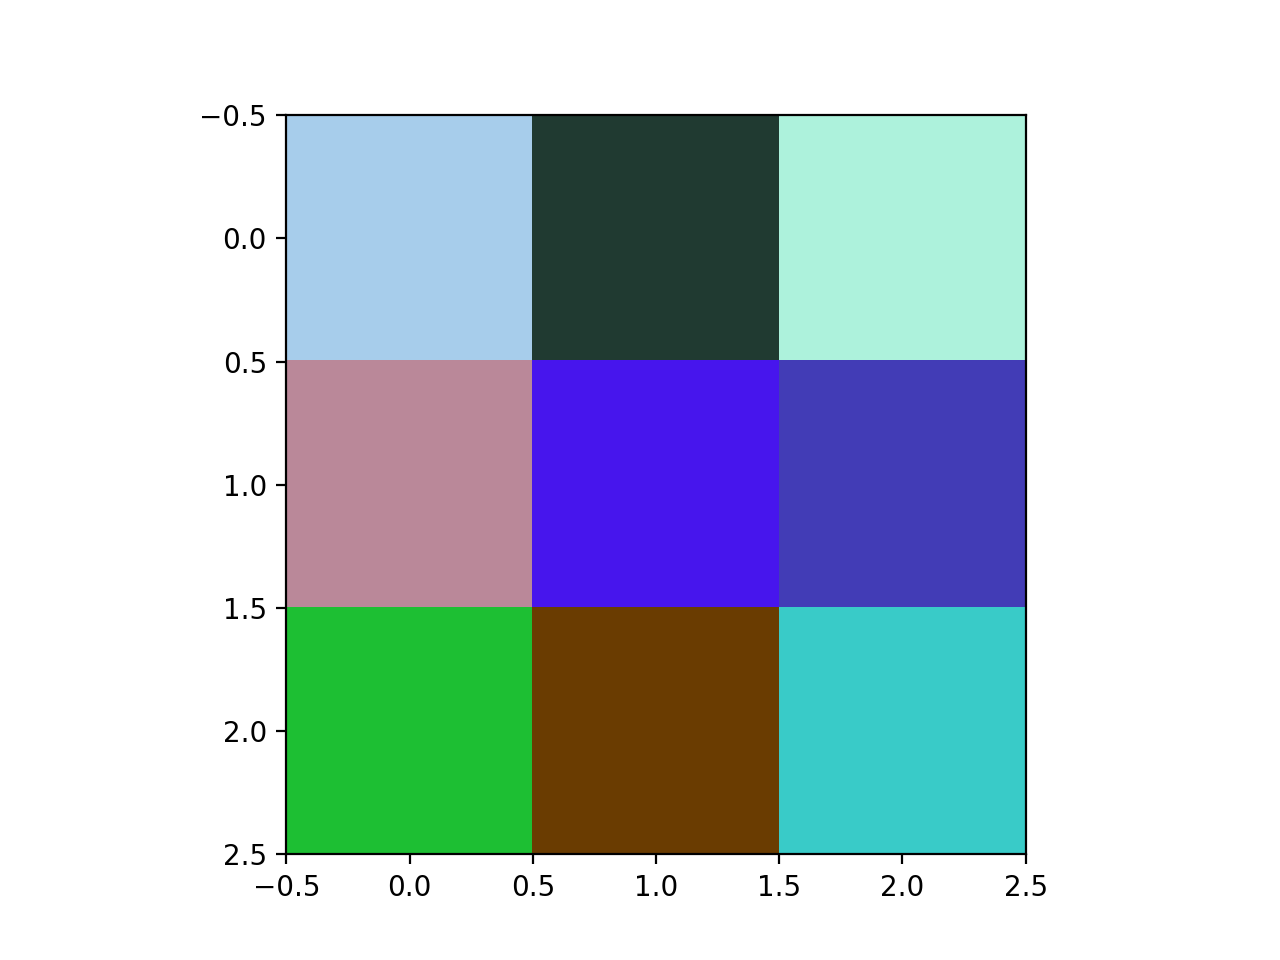

In [75]:
def plot_kernels(tensor, num_cols=6):
    if not tensor.ndim==4:
        raise Exception("assumes a 4D tensor")
    if not tensor.shape[-1]==3:
        raise Exception("last dim needs to be 3 to plot")
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        ax1.imshow(tensor[i])
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
mm = vgg_model.double()
filters = mm.modules
body_model = [i for i in mm.children()][0]
layer1 = body_model[0]
tensor = layer1.weight.data.numpy()
plt.figure()
plt.imshow(tensor[0])


In [74]:
list(vgg_model.parameters())[-2]

Parameter containing:

Columns 0 to 9 
 0.2020 -0.0131 -0.1252  0.1448 -0.1053  0.0758 -0.3834 -0.2160 -0.0410 -0.1244
-0.2147 -0.0860 -0.2479  0.1671 -0.1923 -0.2402  0.0369 -0.1527  0.0702  0.0830
-0.0657 -0.1108  0.2382  0.0208  0.1770  0.1599  0.0331  0.1688 -0.0663 -0.0840
-0.0111  0.1054  0.0356  0.0479  0.1726 -0.1283  0.1681 -0.1278  0.0631  0.0441
-0.0875  0.0685  0.2161 -0.0833 -0.1152  0.0191  0.1273  0.1744  0.0953  0.0183
-0.0839 -0.0708  0.2277 -0.2238  0.1871  0.0595  0.0764  0.1766  0.0670 -0.0845
-0.1611  0.0800  0.0757  0.0433  0.1734  0.0386  0.2506  0.1543  0.0205  0.2272
 0.0897 -0.0471 -0.0825  0.0429 -0.0947  0.0692  0.1201  0.0462  0.1094  0.0392
 0.1044 -0.1830  0.1611  0.1475 -0.2001 -0.2308 -0.4581  0.0499 -0.2727  0.0234
 0.1752  0.1759  0.0910  0.1589  0.0492  0.0208 -0.0062 -0.1620  0.0909  0.0345

Columns 10 to 15 
 0.0349  0.1651 -0.1241  0.0325  0.0193 -0.1768
-0.0295  0.1778 -0.1508 -0.1732  0.1208  0.0790
 0.1526 -0.0309 -0.1621  0.0885  0.1573  0.088

In [41]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = vgg_model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 35 %
Accuracy of   car : 13 %
Accuracy of  bird :  0 %
Accuracy of   cat :  4 %
Accuracy of  deer : 11 %
Accuracy of   dog :  0 %
Accuracy of  frog : 66 %
Accuracy of horse : 28 %
Accuracy of  ship : 24 %
Accuracy of truck : 25 %


In [6]:
'''
Modified from https://github.com/pytorch/vision.git
'''
import math

import torch.nn as nn
import torch.nn.init as init

__all__ = [
    'VGG', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn',
    'vgg19_bn', 'vgg19',
]

class VGG(nn.Module):
    def __init__(self, features,width=512):
        super(VGG, self).__init__()
        self.features = features
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(width, width),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(width, width),
            nn.ReLU(True),
            nn.Linear(width, 10),
        )
         # Initialize weights
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
                m.bias.data.zero_()


    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


def make_layers(cfg, batch_norm=False):
    layers = []
    in_channels = 3
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)

cfg = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 
          512, 512, 512, 512, 'M'],
    'T': [2, 'M', 4, 'M', 8, 8, 'M', 16, 16, 'M', 16, 16, 'M'],

}
def vgg_lite():
    return VGG(make_layers(cfg['T']),width=16)

def vgg11():
    """VGG 11-layer model (configuration "A")"""
    return VGG(make_layers(cfg['A']))


def vgg11_bn():
    """VGG 11-layer model (configuration "A") with batch normalization"""
    return VGG(make_layers(cfg['A'], batch_norm=True))


def vgg13():
    """VGG 13-layer model (configuration "B")"""
    return VGG(make_layers(cfg['B']))


def vgg13_bn():
    """VGG 13-layer model (configuration "B") with batch normalization"""
    return VGG(make_layers(cfg['B'], batch_norm=True))


def vgg16():
    """VGG 16-layer model (configuration "D")"""
    return VGG(make_layers(cfg['D']))


def vgg16_bn():
    """VGG 16-layer model (configuration "D") with batch normalization"""
    return VGG(make_layers(cfg['D'], batch_norm=True))


def vgg19():
    """VGG 19-layer model (configuration "E")"""
    return VGG(make_layers(cfg['E']))


def vgg19_bn():
    """VGG 19-layer model (configuration 'E') with batch normalization"""
    return VGG(make_layers(cfg['E'], batch_norm=True))

In [ ]:
class PruneWrap():
    def __init__(self, model,gpu=False):
        #model params
        self.model = model
        self.gpu = gpu
        self.criterion = torch.nn.CrossEntropyLoss()
        #bookkeeping
        self.activations = []
        self.gradients = []
        self.grad_index = 0
        self.activation_to_layer = {}
        self.filter_ranks = {}
        #callbacks for gradient updates
        register_callbacks()
    def register_callbacks(self):
        activation_index = 0
        for layer, (name, module) in enumerate(self.model.features._modules.items()):
            x = module(x)
            if isinstance(module, torch.nn.modules.conv.Conv2d):
                x.register_hook(self.compute_rank)
                self.activations.append(x)
                self.activation_to_layer[activation_index] = layer
                activation_index += 1
    def test(self,test_data_loader):
        self.model.eval()
        correct = 0
        total = 0
        for i, (batch, label) in enumerate(test_data_loader):
            batch = batch.cuda() if gpu else batch
            output = model(Variable(batch))
            pred = output.data.max(1)[1]
            correct += pred.cpu().eq(label).sum()
            total += label.size(0)
        print "acc :", float(correct) / total
    
    def train(self, optimizer = None, epoches = 10, prune=False):
        if optimizer is None:
            optimizer = optim.SGD(model.classifier.parameters(), lr=0.0001, momentum=0.9)
        for i in range(epoches):
            print "epoch: ", i
            for batch, label in self.train_data_loader:
                batch,label = (batch.cuda(),label.cuda) if self.gpu
                self.model.zero_grad()
                input = Variable(batch)
                if prune:
                    output = self.prunner.forward(input)
                    self.criterion(output, Variable(label)).backward()
                else:
                    self.criterion(self.model(input), Variable(label)).backward()
                    optimizer.step()
        print "Finished fine tuning."
    def rank_prunes(self):
        for batch, label in self.train_data_loader:
                batch,label = (batch.cuda(),label.cuda) if self.gpu
                self.model.zero_grad()
                input = Variable(batch)
        
        self.prunner.normalize_ranks_per_layer()

        return self.prunner.get_prunning_plan(num_filters_to_prune)
    def prune():
        self.test()
    def normalize_ranks_per_layer(self):
        for i in self.filter_ranks:
            v = torch.abs(self.filter_ranks[i])
            v = v / np.sqrt(torch.sum(v * v))
    def compute_rank(self, grad):
        activation_index = len(self.activations) - self.grad_index - 1
        activation = self.activations[activation_index]
        values = torch.sum((activation * grad), dim = 0).sum(dim=2).sum(dim=3)[0, :, 0, 0].data

        # Normalize the rank by the filter dimensions
        values = values / (activation.size(0) * activation.size(2) * activation.size(3))

        if activation_index not in self.filter_ranks:
            self.filter_ranks[activation_index] = torch.FloatTensor(activation.size(1)).zero_().cuda()

        self.filter_ranks[activation_index] += values
        self.grad_index += 1


In [270]:
prune = PruneWrapSparse(2,vgg_model,0,.2,10,2,trainloader)
#prune.test(testloader)

In [273]:
prune.train()

epoch:  0
prunning
Parameter containing:
(0 ,0 ,.,.) = 
 -0.3495 -0.2022 -0.0857
  0.1280  0.2312  0.1938
 -0.3256 -0.0563 -0.1416

(0 ,1 ,.,.) = 
 -0.2782  0.5356 -0.4057
  0.2800  0.0851 -0.0759
  0.2595  0.2357 -0.2905

(0 ,2 ,.,.) = 
  0.1172 -0.2565  0.2003
 -0.5904  0.2356  0.0055
  0.2240 -0.2107 -0.2228

(1 ,0 ,.,.) = 
 -0.4537  0.3870 -0.4482
 -0.2635  0.0218  0.4361
  0.2479 -0.0938  0.0041

(1 ,1 ,.,.) = 
  0.0222 -0.1265  0.2379
  0.2719  0.2435  0.3087
  0.3920  0.0587  0.3398

(1 ,2 ,.,.) = 
  0.2438  0.0767 -0.4262
 -0.5505 -0.4632 -0.1611
 -0.0047 -0.2875 -0.7819
[torch.FloatTensor of size 2x3x3x3]

Parameter containing:
-0.0519
 0.1246
[torch.FloatTensor of size 2]

[]


IndexError: cannot do a non-empty take from an empty axes.

In [272]:

import time
class PruneWrapSparse():
    def __init__(self,epoch_start,model,sparsity_initial,sparsity_target,prune_steps,update_rate,train,gpu=False):
        #model params
        self.model = model.float()
        self.gpu = gpu
        self.criterion = torch.nn.CrossEntropyLoss()
        self.train_loader = train
        self.layers_to_prune = [0,0,0]
        
        #bookkeeping
        self.current_sparsity=0
        self.sparsity_target = sparsity_target
        self.sparsity_initial = sparsity_initial
        self.train_step = epoch_start
        self.prune_steps =prune_steps
        self.update_rate = update_rate
        
    def to_string(self):
        print "current sparsity: " + str(self.current_sparsity)
        print "sparsity target: "+ str(self.sparsity_target)
        print "initial sparsity: " + str(self.sparsity_initial)
        print "current train step: "+ str(self.train_step)
        print "prune steps: "+str(self.prune_steps)
        print "prunning rate: "+str(self.update_rate)
        
    def test(self,test_data_loader):
        self.model.eval()
        correct = 0
        total = 0
        for i, (batch, label) in enumerate(test_data_loader):
            batch,label = (batch.cuda(),label.cuda()) if self.gpu else (batch,label)
            output = self.model(Variable(batch.float()))
            pred = output.data.max(1)[1]
            correct += pred.cpu().eq(label).sum()
            total += label.size(0)
        print "acc :", float(correct) / total
    
    def reset(self):
        self.current_sparsity=0
        self.prune_step =0
    
    def compute_current_target(self):
        return self.sparsity_target+(self.sparsity_initial-self.sparsity_target)*(1-self.train_step/(self.prune_steps*self.train_step))**3
    
    def train(self, optimizer = None, epoches = 10, prune=True):
        start = time.time()
        if optimizer is None:
            optimizer = optim.SGD(self.model.classifier.parameters(), lr=0.0001, momentum=0.9)
        for i in range(epoches):
            print "epoch: ", i
            for batch, label in self.train_loader:
                batch,label = (batch.cuda(),label.cuda()) if self.gpu else (batch,label)
                input = Variable(batch)
                if prune and self.train_step%self.update_rate==0:
                    print "prunning"
                    self.prune()
                self.criterion(self.model(input), Variable(label)).backward()
                optimizer.step()
                self.train_step+=1
        print "Finished fine tuning."
        print "Time elapsed:" + (time.time() - start)
    
    def prune(self):#all conv layers for now
        current_sparsity_target = self.compute_current_target()
        percent_to_prune = current_sparsity_target-self.current_sparsity
        percent_to_prune = .05 #for debugguing
        for layer in list(self.model.children())[0]:
            weight_threshold = self.get_weight_threshold(layer.parameters(),percent_to_prune) 
            layer.parameters()            
         
    def get_weight_threshold(self,params,percent_to_prune):
        weights=[]
        for param in params:
            print param
            weights.extend(list(param.cpu().data.abs().numpy().flatten()))
        threshold = np.percentile(np.array(weights),percent_to_prune)
        print threshold
            

In [ ]:
or p in model.parameters():
        if len(p.data.size()) != 1:
            all_weights += list(p.cpu().data.abs().numpy().flatten())
    threshold = np.percentile(np.array(all_weights), pruning_perc)

In [191]:

layers =list(vgg_model.children())[1]
a=layers[1]

In [275]:
a.weight

Parameter containing:

Columns 0 to 5 
 8.4789e-02 -5.1745e-01 -2.8324e-01 -1.4730e-01 -2.6094e-01 -1.4325e-01
-1.7300e-02 -1.2383e-01  2.5161e-02  1.9244e-01 -1.4718e-01  1.5996e-01
-7.6745e-01 -2.2677e+00 -1.4277e+00  1.1202e-01 -2.3851e+00 -2.3028e-01
-1.0762e+00 -2.5615e+00 -1.5096e+00  2.2530e-01 -2.9269e+00 -5.6580e-01
-1.0762e-01 -6.9904e-02 -1.9143e-01 -1.7245e-01  1.0251e-01  4.1571e-02
-8.2839e-01 -2.1626e+00 -1.3926e+00 -8.1987e-02 -2.7617e+00 -9.1310e-01
-1.2326e+00 -4.4414e+00 -2.9511e+00 -1.6049e-01 -4.7785e+00 -3.1670e-01
-4.4789e+00 -1.6090e+01 -1.0923e+01 -1.2188e-02 -1.8459e+01 -3.0606e+00
-1.2286e+00 -3.5425e+00 -2.4507e+00 -7.0325e-02 -4.3577e+00 -6.1470e-01
-7.9611e-01 -2.4041e+00 -1.7540e+00 -7.2126e-02 -3.0570e+00 -3.9386e-01
-2.7936e+00 -6.5688e+00 -3.4592e+00 -1.4749e-01 -4.8864e+00  7.9112e+00
-7.1419e-01 -3.1134e+00 -2.2324e+00 -2.5086e-01 -3.4731e+00 -5.7006e-01
-8.6770e-02 -3.2238e-02 -8.1321e-02  9.1245e-02  1.2846e-01  1.8719e-01
-9.5400e-02 -6.1951e-02 -

In [267]:
 b=list(a.parameters())[0].cpu().data.abs().numpy().flatten()

In [268]:
np.percentile(np.array(b),.03)

0.00085747047943004876

In [167]:
list(vgg_model.named_parameters())

[('features.0.weight', Parameter containing:
  (0 ,0 ,.,.) = 
   -0.3495 -0.2022 -0.0857
    0.1280  0.2312  0.1938
   -0.3256 -0.0563 -0.1416
  
  (0 ,1 ,.,.) = 
   -0.2782  0.5356 -0.4057
    0.2800  0.0851 -0.0759
    0.2595  0.2357 -0.2905
  
  (0 ,2 ,.,.) = 
    0.1172 -0.2565  0.2003
   -0.5904  0.2356  0.0055
    0.2240 -0.2107 -0.2228
  
  (1 ,0 ,.,.) = 
   -0.4537  0.3870 -0.4482
   -0.2635  0.0218  0.4361
    0.2479 -0.0938  0.0041
  
  (1 ,1 ,.,.) = 
    0.0222 -0.1265  0.2379
    0.2719  0.2435  0.3087
    0.3920  0.0587  0.3398
  
  (1 ,2 ,.,.) = 
    0.2438  0.0767 -0.4262
   -0.5505 -0.4632 -0.1611
   -0.0047 -0.2875 -0.7819
  [torch.FloatTensor of size 2x3x3x3]),
 ('features.0.bias', Parameter containing:
  -0.0519
   0.1246
  [torch.FloatTensor of size 2]),
 ('features.3.weight', Parameter containing:
  (0 ,0 ,.,.) = 
   -0.2654 -0.5109 -0.2595
    0.2750  0.0047 -0.2447
   -0.3049  0.5475  0.1925
  
  (0 ,1 ,.,.) = 
    0.3059 -0.2325  0.2169
   -0.2707 -0.3225 -0.034

In [193]:
b=list(a.parameters())[0]

In [ ]:
if isinstance(mod, nn.modules.conv.Conv2d)

In [194]:
torch.sort(b.abs())

(Variable containing:
 
 Columns 0 to 9 
  0.0273  0.0275  0.0488  0.0537  0.0932  0.1012  0.1272  0.1484  0.1562  0.1928
  0.0137  0.0173  0.0252  0.0781  0.1062  0.1195  0.1238  0.1282  0.1472  0.1501
  0.0088  0.0108  0.0509  0.0513  0.0650  0.0664  0.0862  0.0867  0.1041  0.1072
  0.0089  0.0102  0.0267  0.0327  0.0580  0.0634  0.0642  0.0865  0.1023  0.1271
  0.0034  0.0046  0.0102  0.0636  0.0872  0.1103  0.1237  0.1251  0.1332  0.1353
  0.0114  0.0126  0.0394  0.0633  0.0987  0.1158  0.1286  0.1326  0.1513  0.1526
  0.0180  0.0233  0.0461  0.0514  0.0964  0.0995  0.1249  0.1383  0.1857  0.1977
  0.0438  0.0656  0.0659  0.0745  0.0931  0.1100  0.1108  0.1276  0.1370  0.1453
  0.0258  0.0277  0.0293  0.0369  0.0383  0.0391  0.0503  0.1045  0.1089  0.1749
  0.0105  0.0156  0.0205  0.0342  0.0379  0.0735  0.0889  0.1014  0.1137  0.1174
  0.0018  0.0153  0.0273  0.0361  0.0549  0.0591  0.0600  0.0693  0.0899  0.0932
  0.0192  0.0478  0.0664  0.0735  0.0772  0.0991  0.1028  0.1215  0.

### adapted from https://github.com/pytorch/vision/blob/master/torchvision/models/vgg.py

notes:

questions?:
    1. Data involved or data agnostic
    2. during training or after
    3. Inference citeria, or backprop criteria.
    4. at what point during training do you prune
    5. using gradient and activation signals if one is high
    6. train from scratch work or need long burn in time
    7. VGG is notoriously slow to train with large memory footprint, what about squeeznet, arcitectures that are just better
    8. layerwise or globally
    9. when using speed as metric have to make sure your prunning method is super efficient
 Channel-wise
 10. if not layerwise how do params get masked over time, in what layersc
SSL [49] reaches high compression ratio for first few conv
layers of LeNet [30] and AlexNet [26]. [54] could work
well for fully connected layers. However, training-based
approaches are more costly, and the effectiveness for very
deep networks on large datasets is rarely exploited

